<a href="https://colab.research.google.com/github/gitmangal/gitmangal/blob/main/startup_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2024-02-10 11:45:23.641 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


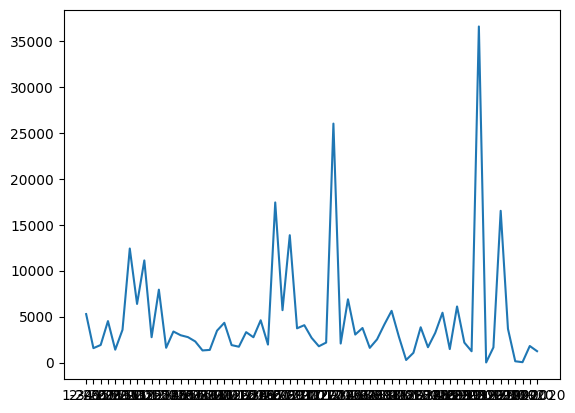

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(layout='wide',page_title='StartUp Analysis')

df = pd.read_csv('startup_cleaned.csv')
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

def load_overall_analysis():
    st.title('Overall Analysis')

    # total invested amount
    total = round(df['amount'].sum())
    # max amount infused in a startup
    max_funding = df.groupby('startup')['amount'].max().sort_values(ascending=False).head(1).values[0]
    # avg ticket size
    avg_funding = df.groupby('startup')['amount'].sum().mean()
    # total funded startups
    num_startups = df['startup'].nunique()

    col1,col2,col3,col4 = st.columns(4)

    with col1:
        st.metric('Total',str(total) + ' Cr')
    with col2:
        st.metric('Max', str(max_funding) + ' Cr')

    with col3:
        st.metric('Avg',str(round(avg_funding)) + ' Cr')

    with col4:
        st.metric('Funded Startups',num_startups)

    st.header('MoM graph')
    selected_option = st.selectbox('Select Type',['Total','Count'])
    if selected_option == 'Total':
        temp_df = df.groupby(['year', 'month'])['amount'].sum().reset_index()
    else:
        temp_df = df.groupby(['year', 'month'])['amount'].count().reset_index()

    temp_df['x_axis'] = temp_df['month'].astype('str') + '-' + temp_df['year'].astype('str')

    fig3, ax3 = plt.subplots()
    ax3.plot(temp_df['x_axis'], temp_df['amount'])

    st.pyplot(fig3)



def load_investor_details(investor):
    st.title(investor)
    # load the recent 5 investments of the investor
    last5_df = df[df['investors'].str.contains(investor)].head()[['date', 'startup', 'vertical', 'city', 'round', 'amount']]
    st.subheader('Most Recent Investments')
    st.dataframe(last5_df)

    col1, col2 = st.columns(2)
    with col1:
        # biggest investments
        big_series = df[df['investors'].str.contains(investor)].groupby('startup')['amount'].sum().sort_values(ascending=False).head()
        st.subheader('Biggest Investments')
        fig, ax = plt.subplots()
        ax.bar(big_series.index,big_series.values)

        st.pyplot(fig)

    with col2:
        verical_series = df[df['investors'].str.contains(investor)].groupby('vertical')['amount'].sum()

        st.subheader('Sectors invested in')
        fig1, ax1 = plt.subplots()
        ax1.pie(verical_series,labels=verical_series.index,autopct="%0.01f%%")

        st.pyplot(fig1)

    print(df.info())

    df['year'] = df['date'].dt.year
    year_series = df[df['investors'].str.contains(investor)].groupby('year')['amount'].sum()

    st.subheader('YoY Investment')
    fig2, ax2 = plt.subplots()
    ax2.plot(year_series.index,year_series.values)

    st.pyplot(fig2)

st.sidebar.title('Startup Funding Analysis')

option = st.sidebar.selectbox('Select One',['Overall Analysis','StartUp','Investor'])

if option == 'Overall Analysis':
    load_overall_analysis()

elif option == 'StartUp':
    st.sidebar.selectbox('Select StartUp',sorted(df['startup'].unique().tolist()))
    btn1 = st.sidebar.button('Find StartUp Details')
    st.title('StartUp Analysis')
else:
    selected_investor = st.sidebar.selectbox('Select StartUp',sorted(set(df['investors'].str.split(',').sum())))
    btn2 = st.sidebar.button('Find Investor Details')
    if btn2:
        load_investor_details(selected_investor)
